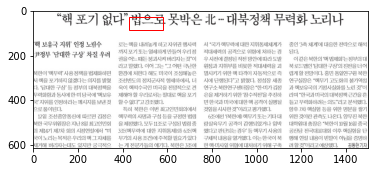

In [123]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


im = Image.open('./img/img6.jpg')

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((107, 20), 178 - 107, 77 - 20, linewidth=1, edgecolor='r', facecolor='none')
rect = patches.Rectangle((428, 27), 581 - 428, 87 - 27, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [124]:
f = open("./result/res_img6.txt", 'r')

box_x = []
box_y = []
box_width = []
box_height = []

while True:
    line = f.readline()
    if not line: break
    coord = line.strip().split(",")
    coord = [int(item) for item in coord]
    box_x.append(coord[0])
    box_y.append(coord[1])
    box_width.append(coord[2] - coord[0])
    box_height.append(coord[5] - coord[1])
    
#     print(coord)
# print(box_x)
# print(box_y)
# print(box_width)
# print(box_height)



f.close()

[60, 64, 64, 66, 58, 61, 63, 26, 33, 33, 33, 33, 26, 26, 26, 26, 24, 26, 26, 28, 24, 26, 24, 25, 23, 23, 23, 26, 23, 23, 23, 33, 33, 33, 33, 33, 26, 26, 29, 26, 26, 26, 26, 24, 26, 23, 30, 30, 24, 26, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26, 24, 25, 23, 25, 24, 28, 30, 25, 23, 23, 23, 23, 23, 23, 26, 23, 21, 23, 26, 25, 25, 25, 25, 25, 25, 25, 25, 28, 28, 25, 23, 28, 21, 21, 21, 23, 26, 24, 28, 26, 24, 26, 26, 26, 26, 26, 21, 24, 26, 24, 26, 24, 24, 26, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 24, 24, 21, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 28, 25, 25, 25, 25, 21, 26, 26, 30, 24, 24, 24, 26, 26, 24, 26, 26, 24, 24, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 29, 26, 26, 28, 26, 26, 26, 21, 23, 25, 23, 25, 23, 25, 25, 25, 25, 25, 25, 25, 25, 28, 25, 25, 25, 25, 26, 26, 24, 28, 21, 21, 23, 21, 23, 23, 25, 23, 23, 23, 23, 23, 25, 23, 23, 23, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 23, 26, 26, 26, 26, 26, 24, 26, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 21, 23, 26]


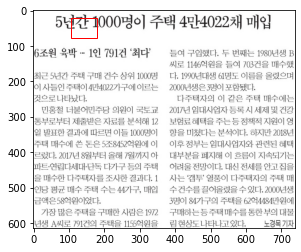

In [125]:
im = Image.open('./img/img7.jpg')

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((107, 20), 178 - 107, 77 - 20, linewidth=1, edgecolor='r', facecolor='none')
# rect = patches.Rectangle((428, 27), 581 - 428, 87 - 27, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

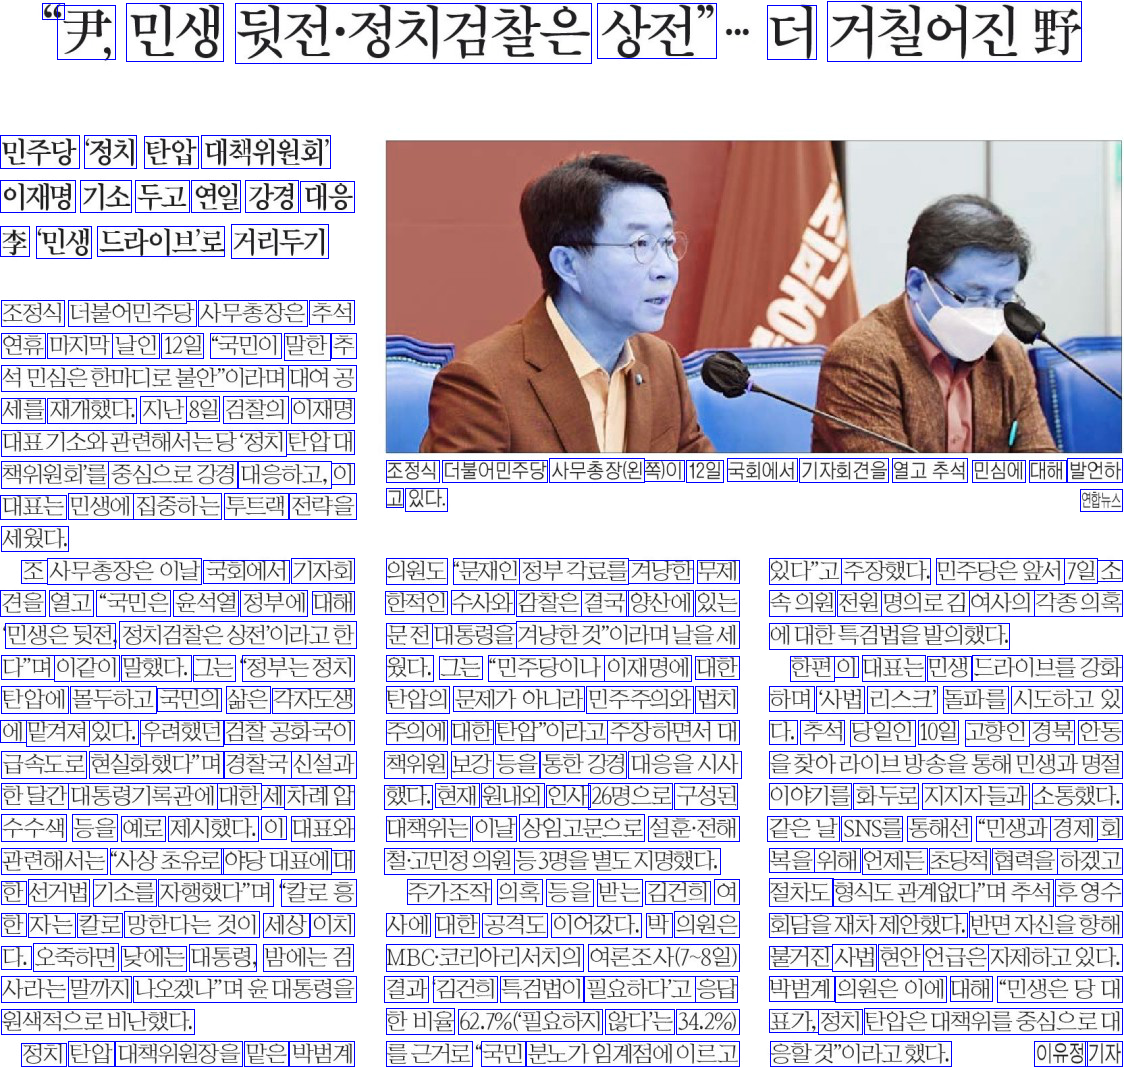

In [239]:
f = open("./result/res_img8.txt", 'r')
image = np.array(Image.open("./img/img8.jpg"))

box_x = []
box_y = []
box_width = []
box_height = []

while True:
    line = f.readline()
    if not line: break
    coord = line.strip().split(",")
    coord = [int(item) for item in coord]
    box_x.append(coord[0])
    box_y.append(coord[1])
    box_width.append(coord[2] - coord[0])
    box_height.append(coord[5] - coord[1])

    cv2.rectangle(image,(coord[0], coord[1]),(coord[2],coord[5]),(255,0,0)) 

cv2_imshow(image)
f.close()

In [240]:
class box : 
    def __init__(self, x1, y1, x2, y2) :
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

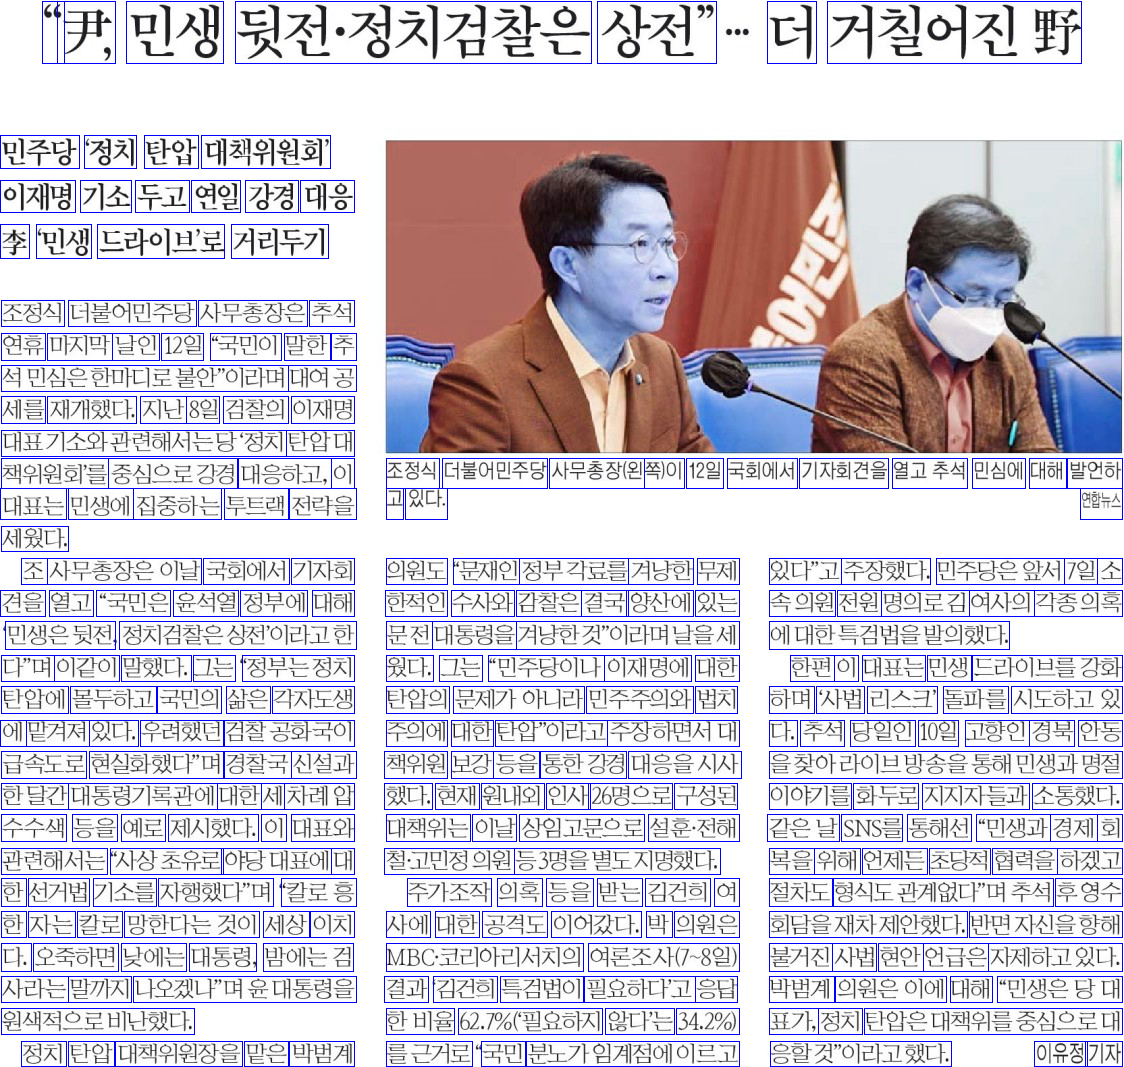

In [272]:
image = np.array(Image.open("./img/img8.jpg"))
f = open("./result/res_img8.txt", 'r')


boxes = [] 

while True:
    line = f.readline()
    if not line: break
    coord = line.strip().split(",")
    coord = [int(item) for item in coord]
    boxes.append(box(coord[0], coord[1], coord[2], coord[5]))

onelines = []
oneline = box(-1, -1, -1, -1)
box_diff = -1
idx = 0

# y맞추기

for i in range(0, len(boxes)) :     
    if i != 0 and abs(boxes[i].y1 - boxes[i-1].y1) >= boxes[i].y2 - boxes[i].y1 :
        onelines.append(oneline)
        for j in range(idx, i) :
            boxes[j].y1 = oneline.y1
            boxes[j].y2 = oneline.y2
        idx = i
        oneline = box(-1, -1, -1, -1)

        
    if boxes[i].x1 < oneline.x1 or oneline.x1 == -1 :
        oneline.x1 = boxes[i].x1
    if boxes[i].y1 < oneline.y1 or oneline.y1 == -1 :
        oneline.y1 = boxes[i].y1
    if boxes[i].x2 > oneline.x2 or oneline.x2 == -1 :
        oneline.x2 = boxes[i].x2
    if boxes[i].y2 > oneline.y2 or oneline.y2 == -1 :
        oneline.y2 = boxes[i].y2

boxes[-1].y1 = oneline.y1
boxes[-1].y2 = oneline.y2

for boxb in boxes : 
    cv2.rectangle(image,(boxb.x1,boxb.y1),(boxb.x2,boxb.y2),(255,0,0))    
#     print(boxb.x1, boxb.x2, boxb.y1, boxb.y2)

cv2_imshow(image)
f.close()


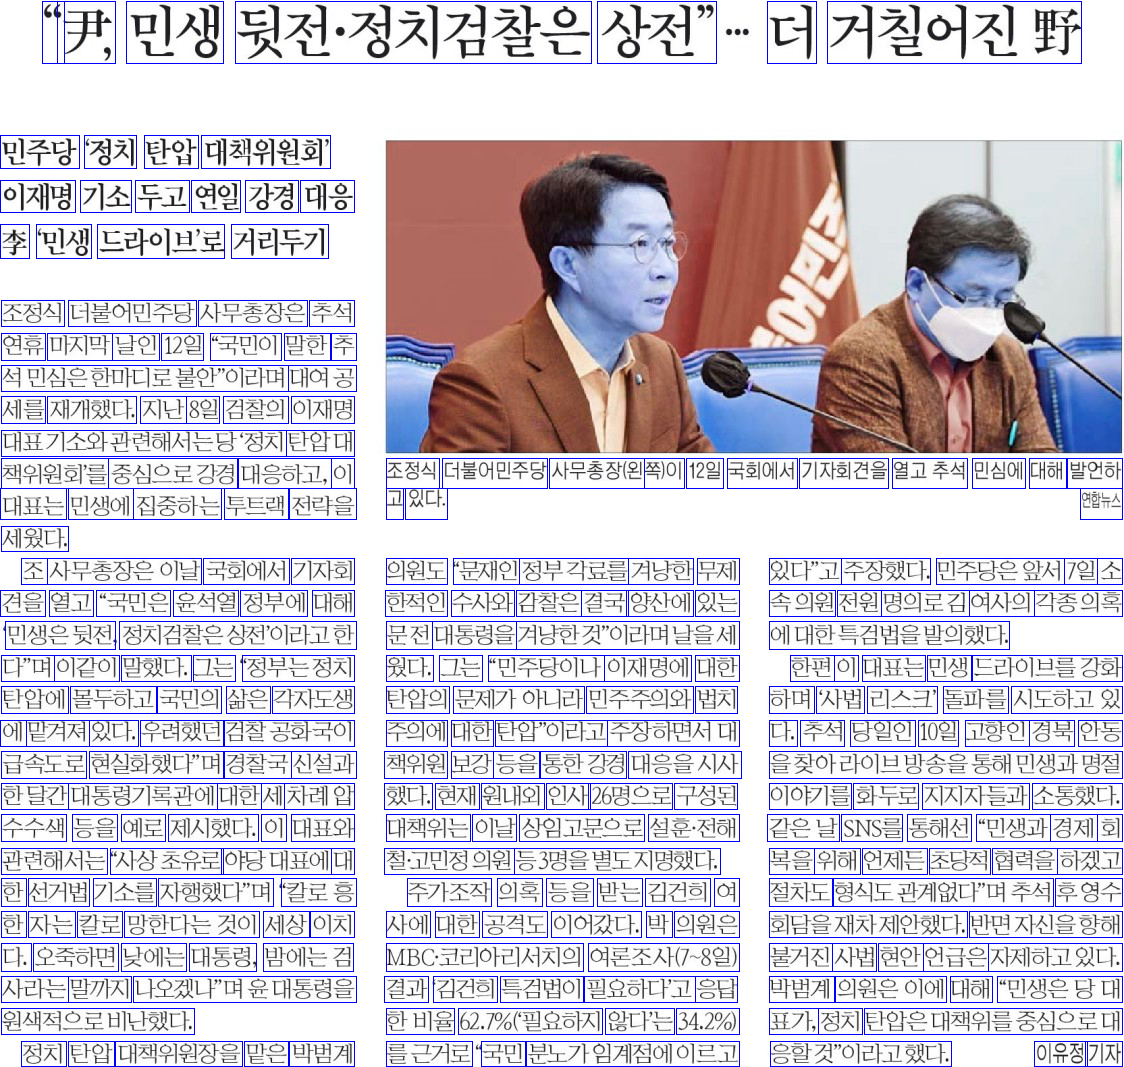

In [304]:
# for boxb in boxes : 

from operator import itemgetter, attrgetter

image = np.array(Image.open("./img/img8.jpg"))

# box를 정렬 
boxes = sorted(boxes, key = attrgetter('y2', 'x1'))
for boxb in sorted(boxes, key = attrgetter('y2', 'x1')) : 
    cv2.rectangle(image,(boxb.x1,boxb.y1),(boxb.x2,boxb.y2),(255,0,0))    

cv2_imshow(image)
    


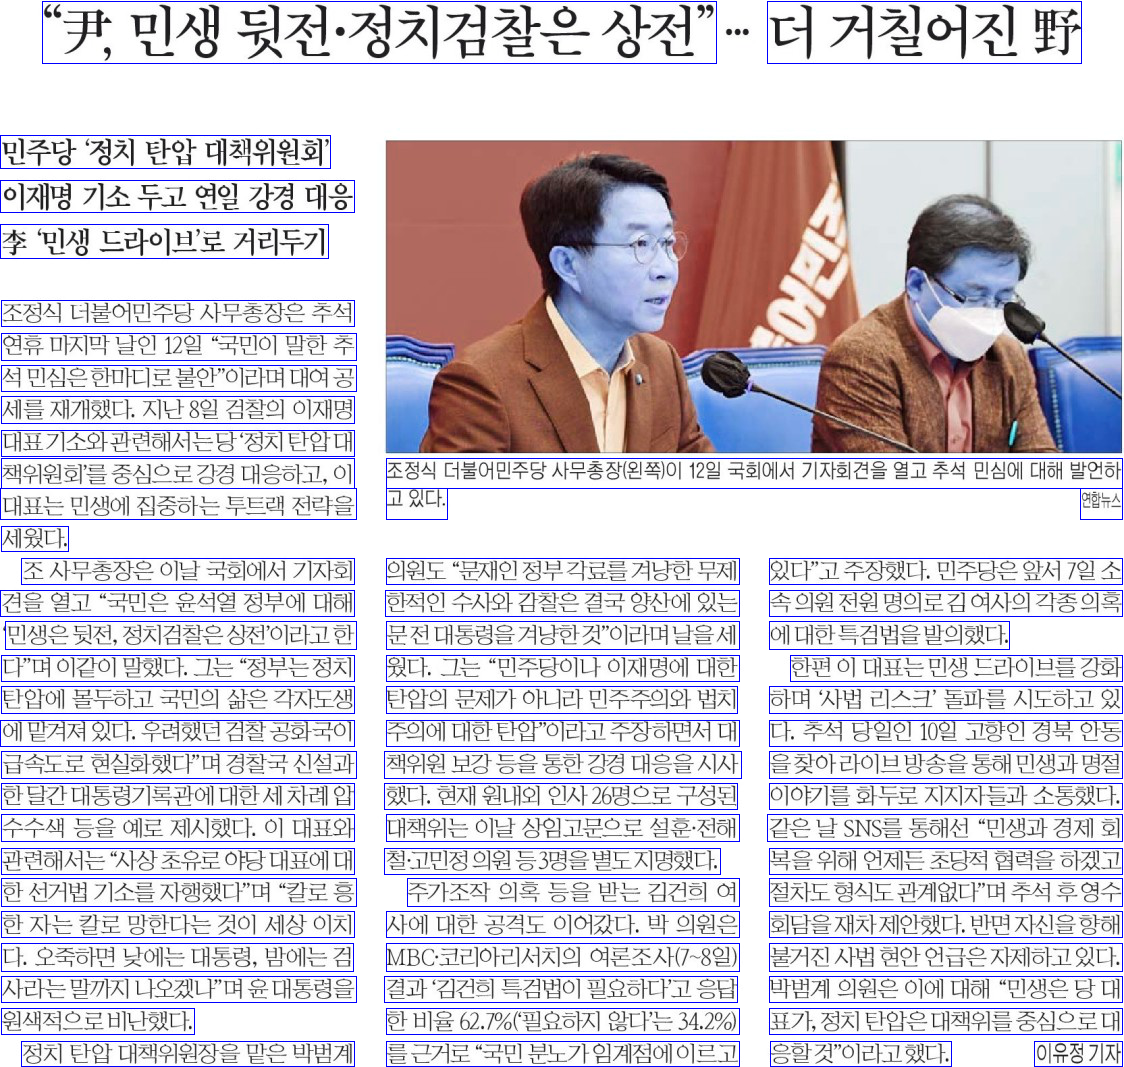

In [374]:
image = np.array(Image.open("./img/img8.jpg"))
onelines = []
oneline = box(-1, -1, -1, -1)
box_diff = -1
idx = 0
num = 0

for i in range(0, len(boxes)) :        
    yflag = 0
    if i != 0 and abs(boxes[i].y1 - boxes[i-1].y1) >= boxes[i].y2 - boxes[i].y1 :
        cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))
        onelines.append(oneline)
        oneline = box(boxes[i].x1, boxes[i].y1, boxes[i].x2, boxes[i].y2)
        yflag = 1
        
    if i != 0 and abs(boxes[i].x1 - boxes[i-1].x2) >= 15: #박스간격이 특정값보다 크면 out
        if yflag == 0 : 
            cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))
            onelines.append(oneline)
            oneline = box(boxes[i].x1, boxes[i].y1, boxes[i].x2, boxes[i].y2)


    if boxes[i].x1 < oneline.x1 or oneline.x1 == -1 :
        oneline.x1 = boxes[i].x1
    if boxes[i].y1 < oneline.y1 or oneline.y1 == -1 :
        oneline.y1 = boxes[i].y1
    if boxes[i].x2 > oneline.x2 or oneline.x2 == -1 :
        oneline.x2 = boxes[i].x2
    if boxes[i].y2 > oneline.y2 or oneline.y2 == -1 :
        oneline.y2 = boxes[i].y2
        
cv2.rectangle(image,(oneline.x1,oneline.y1),(oneline.x2,oneline.y2),(255,0,0))
cv2_imshow(image)

# for boxb in boxes : 
#     cv2.rectangle(image,(boxb.x1,boxb.y1),(boxb.x2,boxb.y2),(255,0,0))    
# #     print(boxb.x1, boxb.x2, boxb.y1, boxb.y2)

# for i in range(1, len(boxes)) : 
#     print(boxes[i].x1, boxes[i].x2, boxes[i].y1, boxes[i].y2)
#     print(boxes[i].x1 - boxes[i-1].x2)

In [358]:
class column : 
    def __init__(self, min_num, max_num, id) :
        self.min_num = min_num
        self.max_num = max_num
        self.id = id
        self.lines = []
    def add_line(self, line) : 
        self.lines.append(line)
        if line.x1 < self.min_num : 
            self.min_num = line.x1
        if line.x2 > self.max_num : 
            self.max_num = line.x2

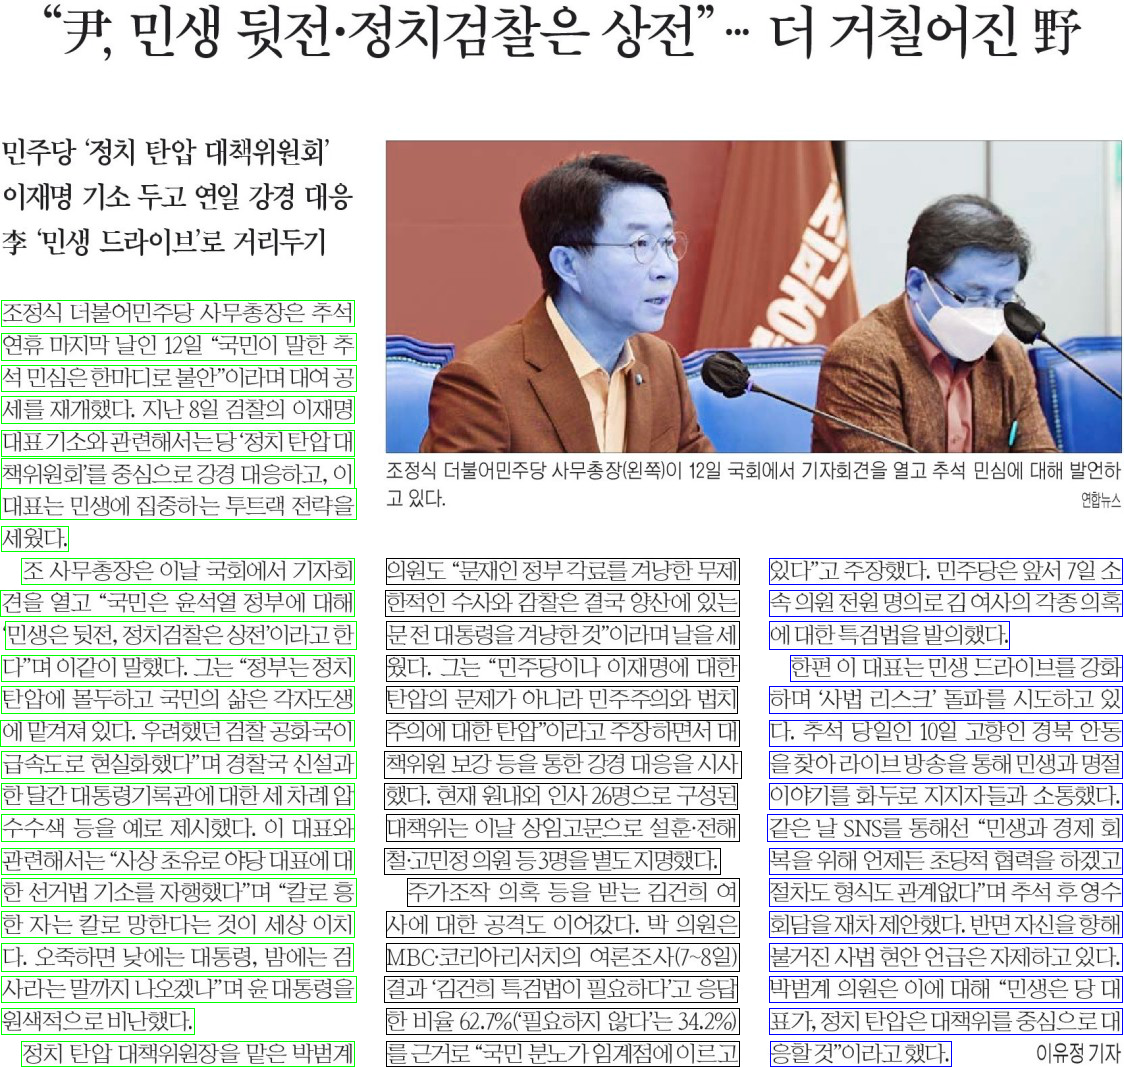

In [392]:
# 얘도 알고리즘 화 해야됨.

headlines = onelines[0:2]
subheadlines = onelines[2:5]
mainlines = onelines[5:]

# for line in mainlines : 
#     print(line.x1, line.x2, line.y1, line.y2)
del mainlines[9]
del mainlines[8]
del mainlines[6]
# 386, 1122
columns = []
id = 1

for line in sorted(mainlines, key = attrgetter('x1', 'x2')) : 
    if len(columns) == 0 or ((line.x1 + line.x2)/2) > columns[-1].max_num : 
        columns.append(column(line.x1, line.x2, id))
        id += 1
    columns[-1].add_line(line)
    
image = np.array(Image.open("./img/img8.jpg"))

for i in range(0, len(columns)) : 
    for line in columns[i].lines :
        cv2.rectangle(image,(line.x1,line.y1),(line.x2, line.y2),(255*i*(i-1), 255*(i-1)*(i-2), 255*i*(i-2)))
cv2_imshow(image)


# print(line.x1, line.x2, line.y1, line.y2)
# for line in x1sortedlines : 
#     print(line.x1, line.x2, line.y1, line.y2)
    
# first column : 0 ~ 356 
# second column : 384 ~ 741
# third column : 767 ~ 1122 

# x1 -> x2 보면서, 
# 0 ~ 354 -> 평균값이 이 안에 있는지 확인, 최대/최소값 바꿔주면서 범위 확정






In [432]:
class paragraph : 
    def __init__(self, line) :
        self.lines = [line]
        self.x1 = line.x1
        self.y1 = line.y1
        self.x2 = line.x2
        self.y2 = line.y2
        
    def add_line(self, line) : 
        self.lines.append(line)
        if self.x2 < line.x1 : 
            prev_box = box(self.x1, self.y1, self.x2, self.y2) 
            self.x1 = line.x1
            self.y1 = line.y1
            self.x2 = line.x2
            self.y2 = line.y2
            return [1, prev_box]
        
        if line.x1 < self.x1 : 
            self.x1 = line.x1
        if line.x2 > self.x2 : 
            self.x2 = line.x2
        if line.y1 < self.y1 : 
            self.y1 = line.y1
        if line.y2 > self.y2 : 
            self.y2 = line.y2    
        return [0, 0]
        

1 354 300 326
1 356 333 360
1 356 365 391
1 354 396 423
1 354 430 456
1 354 458 488
0 356 488 519
1 68 526 551
21 354 558 584
0 354 590 616
5 356 621 649
1 354 655 681
1 354 686 713
0 354 720 746
1 356 751 778
1 354 783 809
1 354 814 841
1 354 848 874
1 356 878 906
1 354 911 937
1 353 943 971
1 356 976 1002
1 194 1008 1034
21 354 1041 1066
386 739 558 584
385 739 590 616
386 739 621 649
386 739 655 681
386 737 686 713
386 739 720 746
384 741 751 778
384 737 783 809
386 739 814 841
384 720 848 874
407 739 878 906
386 739 911 937
386 739 943 971
384 737 976 1002
386 739 1008 1034
386 739 1041 1066
769 1122 558 584
769 1122 590 616
769 1009 621 649
790 1122 655 681
769 1122 686 713
769 1122 720 746
769 1122 751 778
769 1122 783 809
767 1122 814 841
769 1122 848 874
769 1122 878 906
769 1122 911 937
769 1122 943 971
769 1122 976 1002
769 1122 1008 1034
770 951 1041 1066


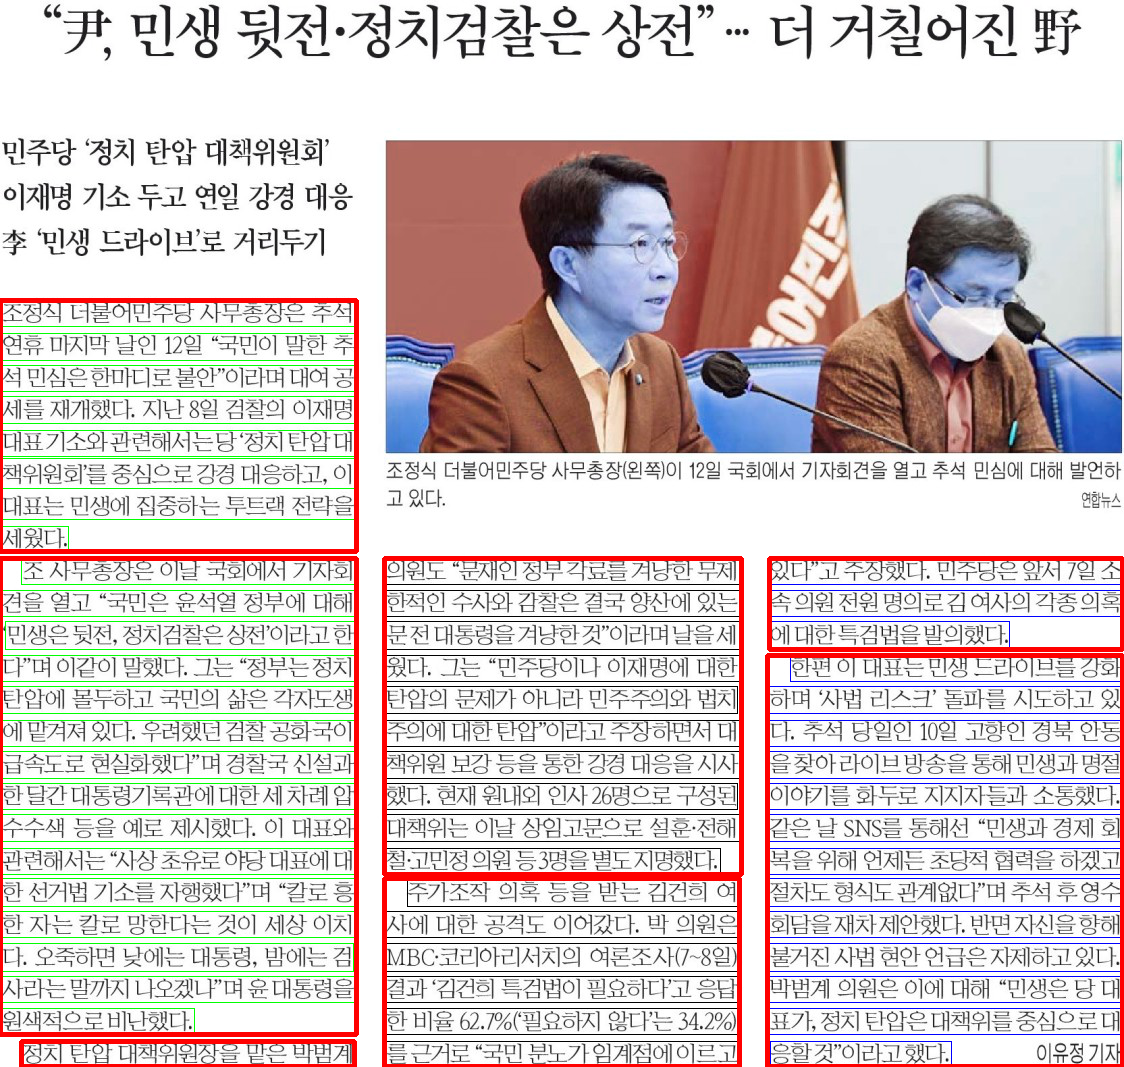

In [435]:
image = np.array(Image.open("./img/img8.jpg"))

paragraphs = []
num = 0

for i in range(0, len(columns)) : 
    for j in range(0, len(columns[i].lines)) :
        
        line = sorted(columns[i].lines, key = attrgetter('y2', 'x1'))[j]
        print(line.x1, line.x2, line.y1, line.y2)
        
        if i == 0 and j == 0 :
            paragraphs.append(paragraph(line))
            
        elif line.x1 - columns[i].min_num > 5: 
            cv2.rectangle(image,(paragraphs[-1].x1,paragraphs[-1].y1),(paragraphs[-1].x2, paragraphs[-1].y2),(0,0,255), 3)
            paragraphs.append(paragraph(line))
            
        else : 
            result = paragraphs[-1].add_line(line)
            if result[0] == 1 : 
                cv2.rectangle(image,(result[1].x1,result[1].y1),(result[1].x2, result[1].y2),(0, 0, 255), 3)
                
        cv2.rectangle(image,(line.x1,line.y1),(line.x2, line.y2),(255*i*(i-1), 255*(i-1)*(i-2), 255*i*(i-2)))
        
cv2.rectangle(image,(paragraphs[-1].x1,paragraphs[-1].y1),(paragraphs[-1].x2, paragraphs[-1].y2),(0,0,255), 3)
cv2_imshow(image)